In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import skimage
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from matplotlib import pyplot as plt
from PIL import Image, ImageEnhance
%matplotlib inline

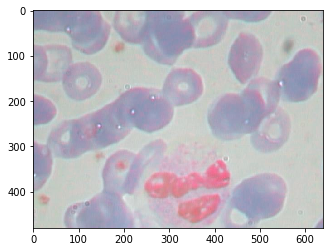

In [2]:
path ='images/BloodImage_00005.jpg'
image = cv2.imread(path)
plt.imshow(image)

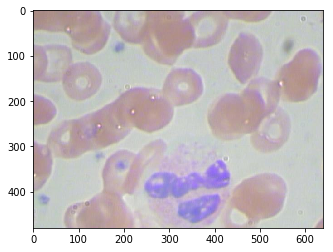

In [3]:
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

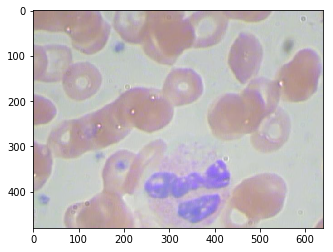

In [4]:
denois = cv2.fastNlMeansDenoising(rgb, None, 1, 13)
plt.imshow(denois)

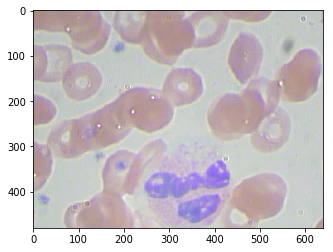

In [5]:
sharpen= cv2.GaussianBlur(denois, (9,9), 10.0)
sharp = cv2.addWeighted(denois, 1.5, sharpen, -0.5, 0, rgb)
plt.imshow(sharp)

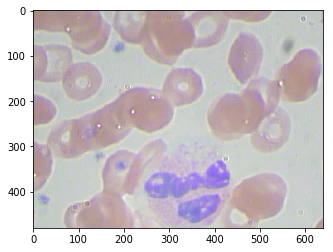

In [6]:
(h1, w1) = sharp.shape[:2]
seg = cv2.cvtColor(sharp, cv2.COLOR_RGB2LAB)
seg = sharp.reshape((sharp.shape[0] * sharp.shape[1], 3))
clt = KMeans(n_clusters = 8)
labels1 = clt.fit_predict(seg)
quant1 = clt.cluster_centers_.astype("uint8")[labels1]
quant1 = quant1.reshape((h1, w1, 3))
seg = seg.reshape((h1, w1, 3))
plt.imshow(seg)





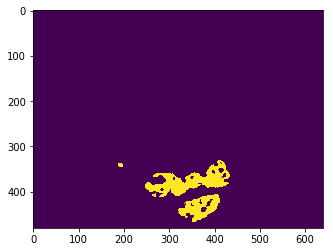

In [7]:
hsv = cv2.cvtColor(seg, cv2.COLOR_RGB2HSV)
lower_green = np.array([90,80,160])
upper_green = np.array([150,140,255])
mask = cv2.inRange(hsv, lower_green, upper_green)
plt.imshow(mask)

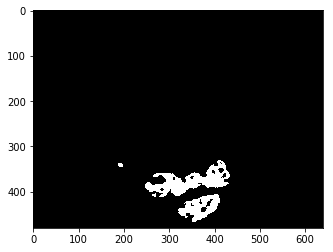

In [8]:
plt.imsave('gray.png',mask, cmap = 'gray')
gray=cv2.imread('gray.png')

plt.imshow(gray)

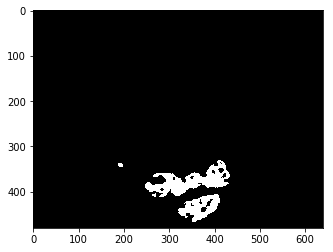

In [9]:
denois1 = cv2.fastNlMeansDenoising(gray, None, 1, 13)
plt.imshow(denois1)

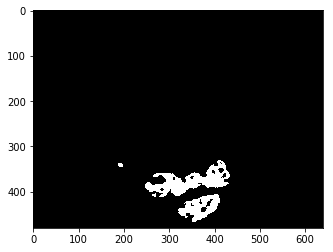

In [10]:
sharpen1= cv2.GaussianBlur(denois1, (9,9), 10.0)
sharp1 = cv2.addWeighted(denois1, 1.5, sharpen1, -0.5, 0, gray)
plt.imshow(sharp1)

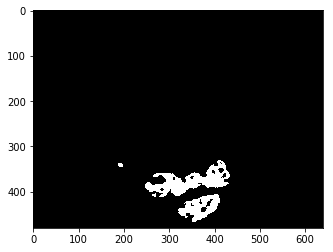

In [11]:
retval,im = cv2.threshold(sharp1, 125,255,cv2.THRESH_BINARY )
plt.imshow(im)
           